<a href="https://colab.research.google.com/github/Rotha-Vichet/Deep-learning-House-pricing-prediction/blob/main/Deeplearning_housePricing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [38]:
#import Data
Data = pd.read_csv('https://raw.githubusercontent.com/Rotha-Vichet/Deep-learning-House-pricing-prediction/main/kc_house_data.csv')
Data.head(5).T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [39]:
#get some information about Data-Set
Data.info()
Data.isnull().sum()
# remove unecessary column
Data = Data.drop('date',axis=1)
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [40]:
X = Data.drop('price',axis =1).values
y = Data['price'].values
#splitting Train and Test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [41]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

<ipython-input-41-71c309465cd7>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
<ipython-input-41-71c309465cd7>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


In [44]:
# having 19 neuron is based on the number of available features
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [45]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)
model.summary()

Epoch 1/400
114/114 [==============================] - 1s 6ms/step - loss: 425270673408.0000 - val_loss: 428820627456.0000
Epoch 2/400
114/114 [==============================] - 0s 3ms/step - loss: 424165048320.0000 - val_loss: 424592211968.0000
Epoch 3/400
114/114 [==============================] - 0s 4ms/step - loss: 407089315840.0000 - val_loss: 383071813632.0000
Epoch 4/400
114/114 [==============================] - 0s 4ms/step - loss: 318778900480.0000 - val_loss: 237160726528.0000
Epoch 5/400
114/114 [==============================] - 0s 4ms/step - loss: 160575012864.0000 - val_loss: 97610145792.0000
Epoch 6/400
114/114 [==============================] - 1s 4ms/step - loss: 88492498944.0000 - val_loss: 75116544000.0000
Epoch 7/400
114/114 [==============================] - 0s 4ms/step - loss: 77276028928.0000 - val_loss: 69108957184.0000
Epoch 8/400
114/114 [==============================] - 0s 4ms/step - loss: 71787249664.0000 - val_loss: 65154912256.0000
Epoch 9/400
114/114 [==

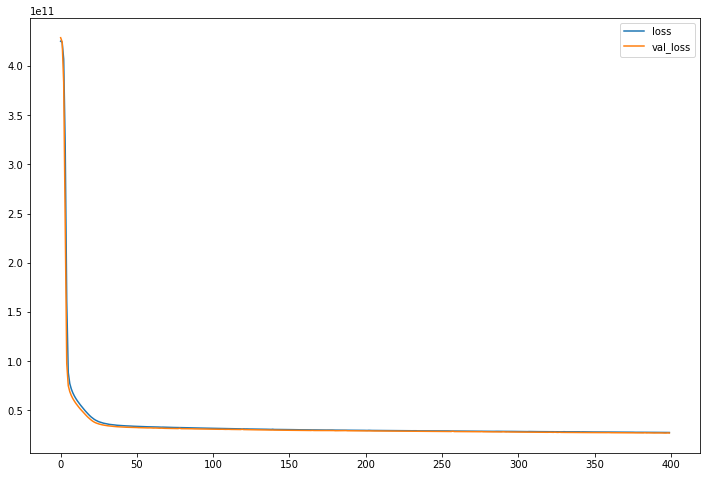

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))